## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [2]:
data=pd.read_excel("/content/glass.xlsx",sheet_name="glass")


# EDA

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Visualizations

### HeatMap

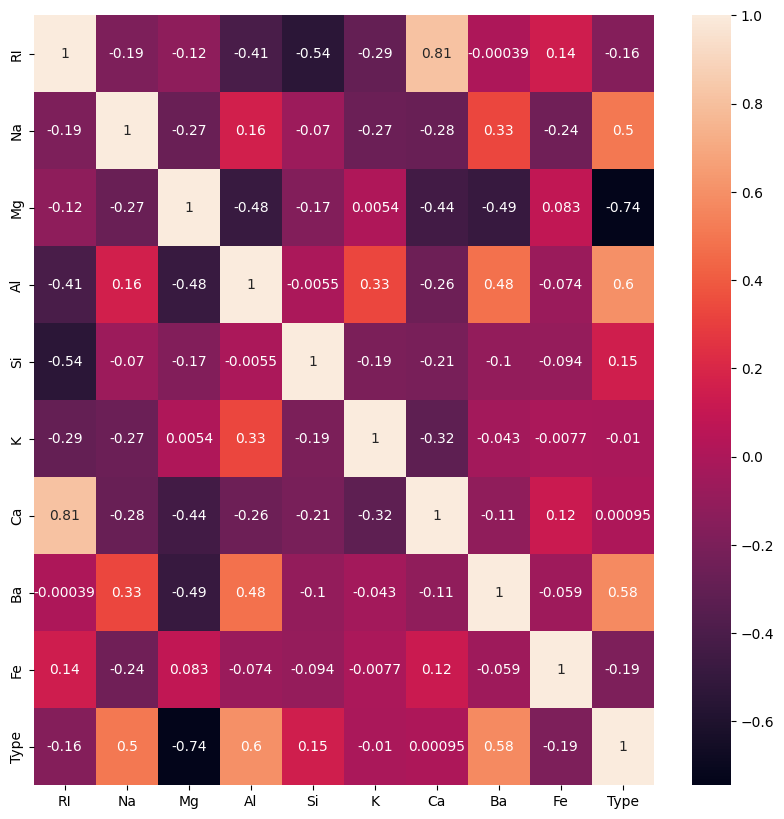

In [4]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Scatterplots

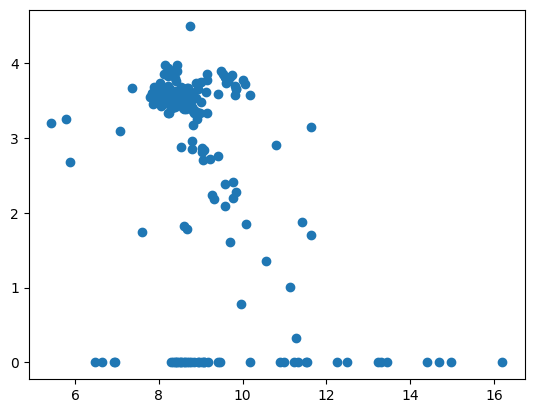

In [5]:
plt.scatter(data["Ca"],data["Mg"])
plt.show()

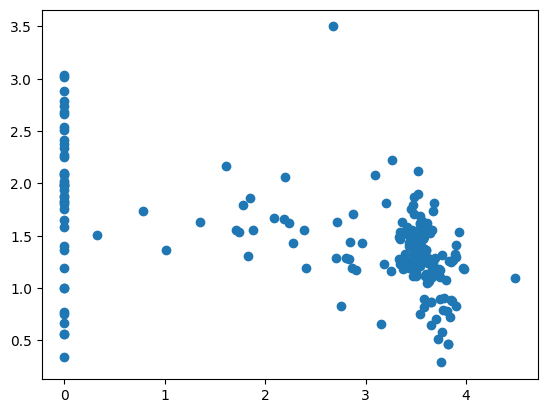

In [6]:
plt.scatter(data["Mg"],data["Al"])
plt.show()

<Axes: xlabel='Type', ylabel='Mg'>

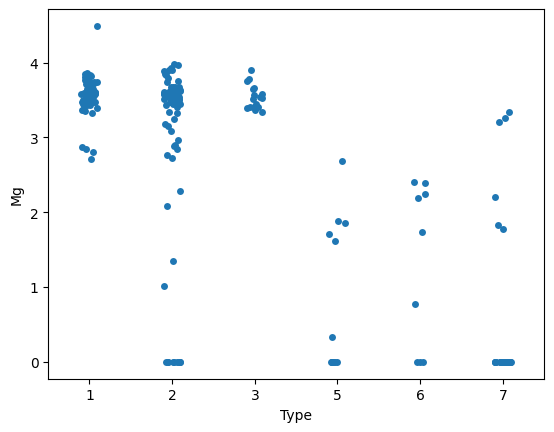

In [7]:
sns.stripplot(x="Type",y="Mg",data=data)

### Stripplots

<Axes: xlabel='Type', ylabel='Ba'>

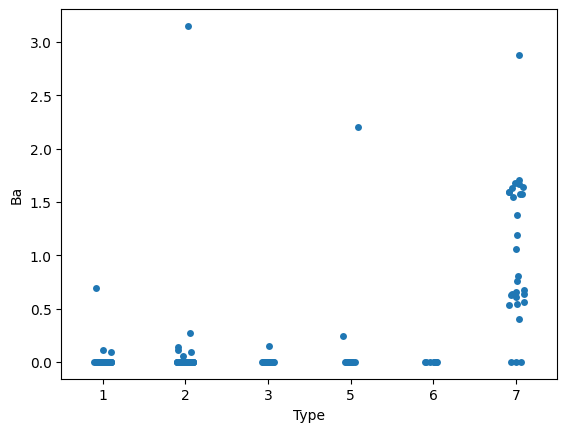

In [8]:
sns.stripplot(x="Type",y="Ba",data=data)

<Axes: xlabel='Type', ylabel='Na'>

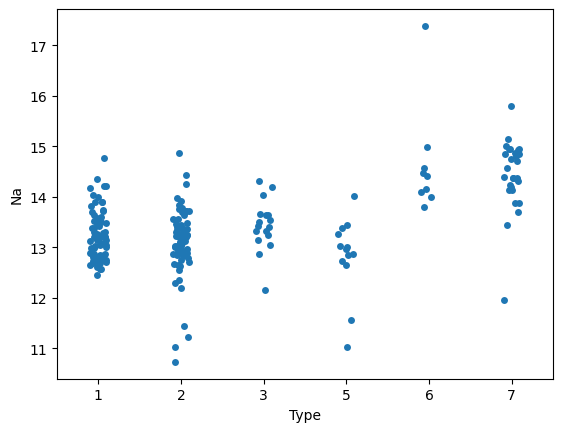

In [9]:
sns.stripplot(x="Type",y="Na",data=data)

<Axes: xlabel='Type', ylabel='Al'>

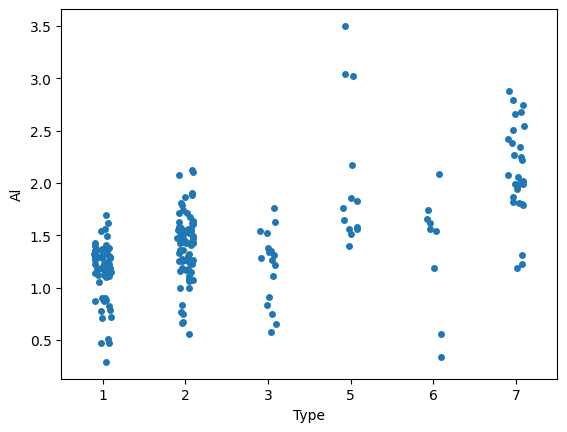

In [10]:
sns.stripplot(x="Type",y="Al",data=data)

<Axes: ylabel='count'>

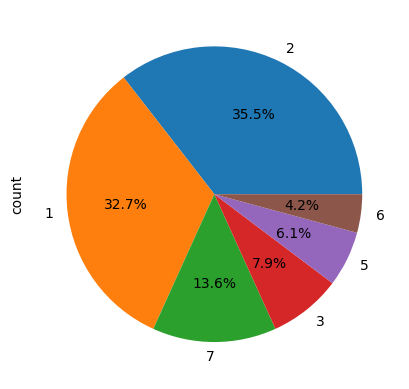

In [11]:
data["Type"].value_counts().plot(kind="pie",autopct="%1.1f%%")

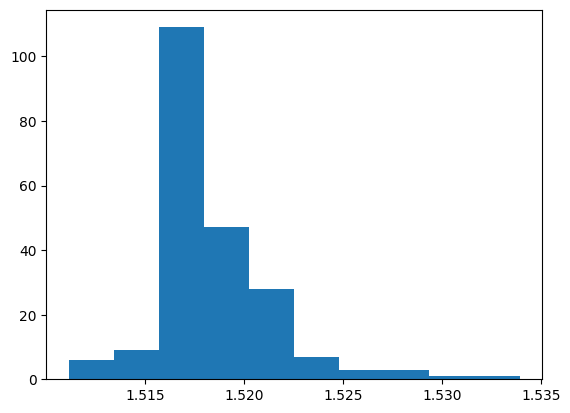

In [12]:
plt.hist(data["RI"],bins=10)
plt.show()

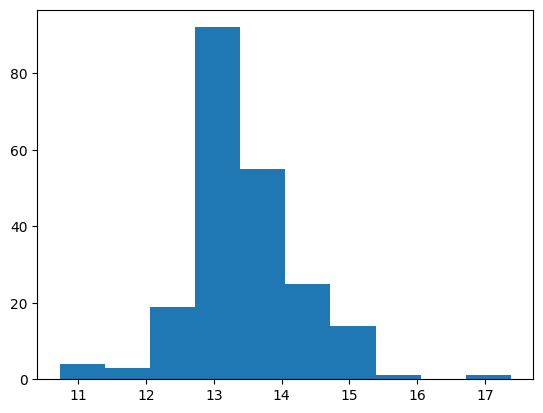

In [13]:
plt.hist(data["Na"],bins=10)
plt.show()

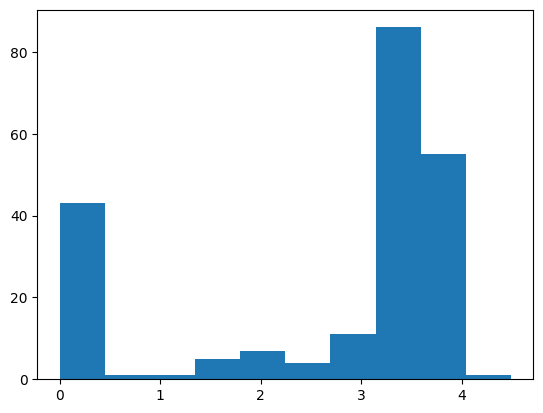

In [14]:
plt.hist(data["Mg"],bins=10)
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### Detecting Missing Values

In [16]:
data.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


### Duplicates

In [17]:
data.duplicated().sum()

1

In [18]:
data[data.duplicated(keep=False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [19]:
data.drop_duplicates(keep="first",inplace=True) #Remove Duplicates

In [20]:
data.reset_index(drop=True,inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## Detecting and Treating Outiers

In [22]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


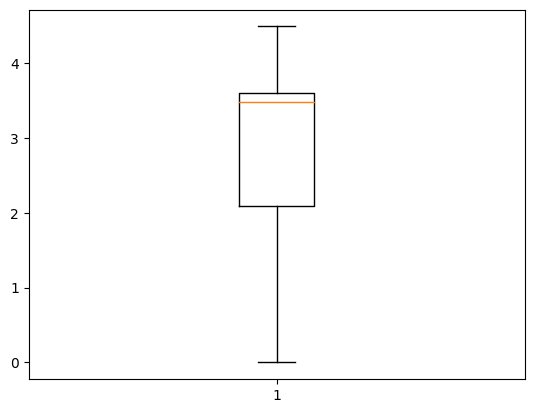

In [23]:
plt.boxplot(data["Mg"])
plt.show()

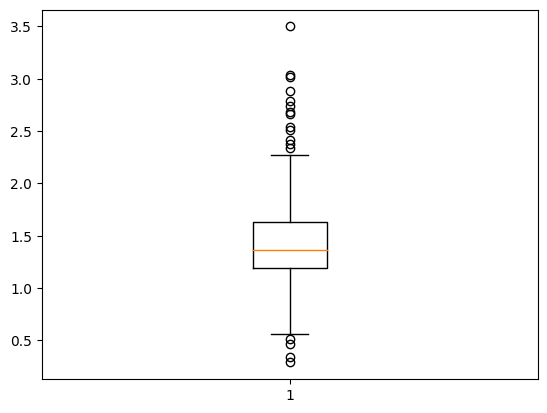

In [24]:
plt.boxplot(data["Al"])
plt.show()

In [25]:
al_iqr=1.63-1.19
upperlimit_al=1.63+1.5*al_iqr
lowerlimit_al=1.19-1.5*al_iqr
print(upperlimit_al)
print(lowerlimit_al)

2.29
0.53


In [26]:
data.Al[data["Al"]>upperlimit_al].count()

13

In [27]:
data.Al[data["Al"]<lowerlimit_al].count()

4

In [28]:
data.Al[data["Al"]>upperlimit_al]=upperlimit_al
data.Al[data["Al"]<lowerlimit_al]=lowerlimit_al

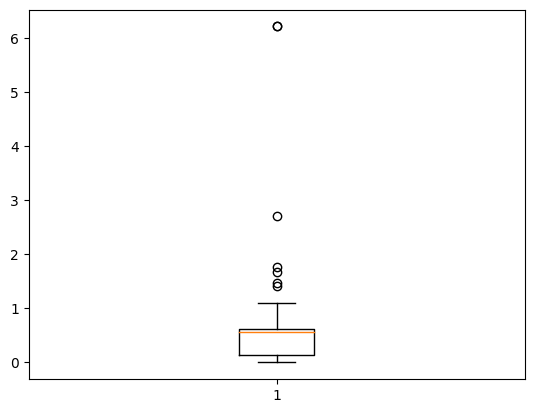

In [29]:
plt.boxplot(data["K"])
plt.show()

In [30]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.424977,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.420895,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.530000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,2.290000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [31]:
iqr_k=0.56-0.498873
upperlimit_k=0.56+1.5*iqr_k
upperlimit_k

0.6516905000000002

In [32]:
data.K[data["K"]>upperlimit_k].count()

30

In [33]:
data.K[data["K"]>upperlimit_k]=upperlimit_k

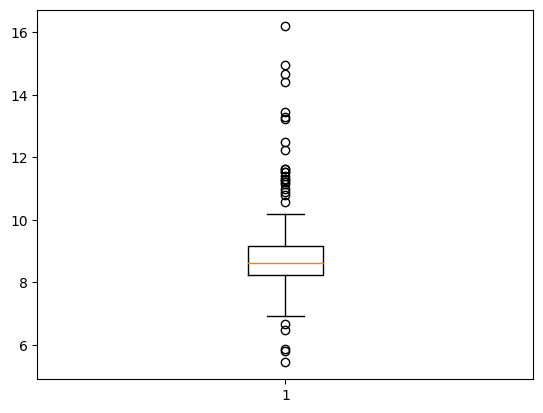

In [34]:
plt.boxplot(data["Ca"])
plt.show()

In [35]:
iqr_ca=9.15-8.24
upperlimit_ca=9.15+1.5*iqr_ca
lowerlimit_ca=8.24-1.5*iqr_ca
print(upperlimit_ca)
print(lowerlimit_ca)

10.515
6.875


In [36]:
data.Ca[data["Ca"]>upperlimit_ca].count()

22

In [37]:
data.Ca[data["Ca"]<lowerlimit_ca].count()

5

In [38]:
data.Ca[data["Ca"]>upperlimit_ca]=upperlimit_ca
data.Ca[data["Ca"]<lowerlimit_ca]=lowerlimit_ca

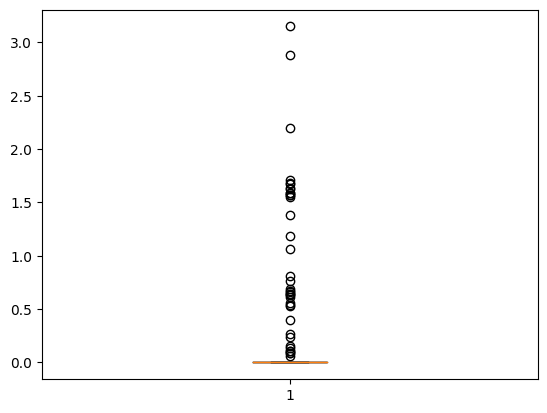

In [39]:
plt.boxplot(data["Ba"])
plt.show()

In [40]:
data.Ba[data["Ba"]>0.5]=0.5

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## Standardization

In [42]:
scale=StandardScaler()
def scaling(data):
  for i in data.columns:
    if data[i].dtype=="float64":
      data[i]=scale.fit_transform(data[[i]])
  return data


In [43]:
scaling(data)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,-0.773927,-1.133248,-1.408403,-0.044419,-0.430054,-0.588301,1
1,-0.243816,0.596403,0.639311,-0.154741,0.097037,0.273542,-1.115733,-0.430054,-0.588301,1
2,-0.716412,0.154546,0.604596,0.273927,0.433746,-0.086874,-1.173956,-0.430054,-0.588301,1
3,-0.227291,-0.238216,0.701798,-0.321445,-0.058368,0.633959,-0.661589,-0.430054,-0.588301,1
4,-0.306608,-0.164573,0.653197,-0.440519,0.550299,0.553867,-0.836260,-0.430054,-0.588301,1
...,...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.060042,-0.058368,-1.328311,0.456303,2.494644,-0.588301,7
209,-0.494986,1.860605,-1.860172,1.345596,0.524398,-1.648681,-0.451984,2.494644,-0.588301,7
210,0.760865,1.173272,-1.860172,1.417041,0.990612,-1.648681,-0.405405,2.494644,-0.588301,7
211,-0.607351,1.197820,-1.860172,1.226522,1.236668,-1.648681,-0.358827,2.494644,-0.588301,7


## Splitting the dataset into Training and Testing

In [44]:
x=data.iloc[:,:-1]    #separating Target and Independent variables
y=data.iloc[:,-1]

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((149, 9), (64, 9), (149,), (64,))

## Applying RandomForestClassifier Model

In [47]:
 model=RandomForestClassifier(
     n_estimators=100,
     criterion="gini",
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     max_features="log2"
 )

In [48]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features='log2')

In [49]:
y_pred=model.predict(x_test)

## Evaluation metrics

In [50]:
accuracy_score(y_test,y_pred)    #Accuracy we got was 73%.It was good.But we need to improve accuracy by the best parameter values

0.734375

In [ ]:
Print(classification_report(y_test,y_pred)

## Hyperparameters Tuning

In [51]:
param_grid={
    "n_estimators":[100,200,300],
    "criterion":["gini","entropy"],
    "max_depth":[None,1,2,3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3,4,5],
    "max_features":["sqrt","log2"]
}
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
grid.bestparams,grid.best_score_

## Applying the Bagging Model

In [52]:
model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.71875

## Applying simple Boosting model

In [53]:
model = AdaBoostClassifier(n_estimators=100, random_state=36)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.546875

### Comparing and Analysing Both Models :-

Both Bagging and Boosting are ensemble learning techniques designed to improve the performance of machine learning models by combining multiple models.

However Bagging model giving more better accuracy compares with boosting model.